<a href="https://colab.research.google.com/github/KerolsMagdey/Deep-Learning/blob/main/chest_xray_pneumonia_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import kagglehub
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Download dataset from Kaggle
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print("Path to dataset files:", path)

# Define directories
train_dir = os.path.join(path, "chest_xray/train")
val_dir = os.path.join(path, "chest_xray/val")
test_dir = os.path.join(path, "chest_xray/test")

# Parameters
IMG_HEIGHT, IMG_WIDTH = 224, 224  # Input size for MobileNet
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 2

# Data generators
train_datagen = ImageDataGenerator(rescale=1.0/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load MobileNet
base_model = MobileNet(weights="imagenet", include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Replaces Flatten for MobileNet
x = Dense(128, activation="relu")(x)
predictions = Dense(NUM_CLASSES, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Print training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print(f"Training Accuracy over epochs: {train_acc}")
print(f"Validation Accuracy over epochs: {val_acc}")


100%|██████████| 2.29G/2.29G [01:47<00:00, 22.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 108s 583ms/step - accuracy: 0.7838 - loss: 0.4592 - val_accuracy: 0.8750 - val_loss: 0.3054
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 99s 578ms/step - accuracy: 0.9289 - loss: 0.1686 - val_accuracy: 0.8750 - val_loss: 0.2159
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 97s 572ms/step - accuracy: 0.9485 - loss: 0.1302 - val_accuracy: 0.9375 - val_loss: 0.2246
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 97s 563ms/step - accuracy: 0.9563 - loss: 0.1226 - val_accuracy: 0.9375 - val_loss: 0.2006
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 573ms/step - accuracy: 0.9600 - loss: 0.1030 - val_accuracy: 0.8750 - val_loss: 0.2102
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 95s 563ms/step - accuracy: 0.9701 - loss: 0.0855 - val_accuracy: 1.0000 - val_loss: 0.1536
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 144s 567ms/step - accuracy: 0.9708 - loss: 0.0800 - val_accuracy: 0.8750 - val_loss: 0.2268
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 567ms/step - accuracy: 0.9698 - loss: 0.0804 -

In [ ]:
# Import necessary libraries
import os
import kagglehub
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [ ]:
# Download dataset from Kaggle
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print("Path to dataset files:", path)

# Define directories for train, validation, and test sets
train_dir = os.path.join(path, "chest_xray/train")
val_dir = os.path.join(path, "chest_xray/val")
test_dir = os.path.join(path, "chest_xray/test")


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [ ]:
# Parameters for training
IMG_HEIGHT, IMG_WIDTH = 224, 224  # Input size for MobileNet
BATCH_SIZE = 32
EPOCHS = 10  # Increased epochs for better training
NUM_CLASSES = 2  # "Normal" and "Pneumonia" classes


In [ ]:
# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    rotation_range=20,  # Rotate images randomly up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by 20%
    height_shift_range=0.2,  # Shift images vertically by 20%
    shear_range=0.2,  # Shear images
    zoom_range=0.2,  # Zoom in/out on images
    horizontal_flip=True  # Flip images horizontally
)

# Validation and Test Data Generators (no augmentation, just normalization)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Flow from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Load MobileNet with pre-trained weights, excluding the top layer
base_model = MobileNet(weights="imagenet", include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Unfreeze the last 20 layers for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True


In [ ]:
# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduce dimensions
x = Dense(256, activation="relu")(x)  # Dense layer with 256 units
x = Dropout(0.5)(x)  # Dropout for regularization
predictions = Dense(NUM_CLASSES, activation="softmax")(x)  # Output layer with 2 classes

# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)
model.summary();

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,491,778 (13.32 MB)

 Trainable params: 3,469,890 (13.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [ ]:
# Compile the model with an optimizer, loss function, and metrics
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Adam optimizer with a small learning rate
    loss="categorical_crossentropy",  # Loss function for multi-class classification
    metrics=["accuracy"]  # Monitor accuracy
)


In [ ]:
# Define callbacks for learning rate adjustment and early stopping
callbacks = [
    ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1),  # Reduce learning rate
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1)  # Stop if no improvement
]


In [ ]:
# Train the model with training and validation data
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=callbacks
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 139s 628ms/step - accuracy: 0.8781 - loss: 0.2917 - val_accuracy: 0.6875 - val_loss: 1.2492 - learning_rate: 1.0000e-04
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 601ms/step - accuracy: 0.9618 - loss: 0.1062 - val_accuracy: 0.8125 - val_loss: 0.4681 - learning_rate: 1.0000e-04
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 100s 593ms/step - accuracy: 0.9745 - loss: 0.0682 - val_accuracy: 0.9375 - val_loss: 0.1874 - learning_rate: 1.0000e-04
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 592ms/step - accuracy: 0.9782 - loss: 0.0595 - val_accuracy: 1.0000 - val_loss: 0.0551 - learning_rate: 1.0000e-04
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 592ms/step - accuracy: 0.9809 - loss: 0.0496 - val_accuracy: 0.9375 - val_loss: 0.1325 - learning_rate: 1.0000e-04
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 599ms/step - accuracy: 0.9841 - loss: 0.0488 - val_accuracy: 1.0000 - val_loss: 0.0161 - learning_rate: 1.0000e-04
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 599ms/

In [ ]:
# Evaluate the trained model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step - accuracy: 0.9377 - loss: 0.1776
Test Loss: 0.2520208954811096
Test Accuracy: 0.9262820482254028


In [ ]:
# Retrieve training and validation accuracy from history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print(f"Training Accuracy over epochs: {train_acc}")
print(f"Validation Accuracy over epochs: {val_acc}")


Training Accuracy over epochs: [0.9238880276679993, 0.9662576913833618, 0.9756518602371216, 0.9779524803161621, 0.9796779155731201, 0.980636477470398, 0.985237717628479, 0.9846625924110413, 0.9879217743873596, 0.9879217743873596]
Validation Accuracy over epochs: [0.6875, 0.8125, 0.9375, 1.0, 0.9375, 1.0, 0.875, 1.0, 1.0, 0.9375]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Get predictions on the test set
predictions = model.predict(test_generator, batch_size=BATCH_SIZE, verbose=1)

# Convert predictions to class labels (0 or 1)
predicted_classes = tf.argmax(predictions, axis=1).numpy()

# Get true labels from the test generator
true_classes = test_generator.classes

# Check the first few predictions and true labels
print(f"Predicted classes: {predicted_classes[:10]}")
print(f"True classes: {true_classes[:10]}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 286ms/step
Predicted classes: [1 1 1 0 1 1 1 0 0 1]
True classes: [0 0 0 0 0 0 0 0 0 0]


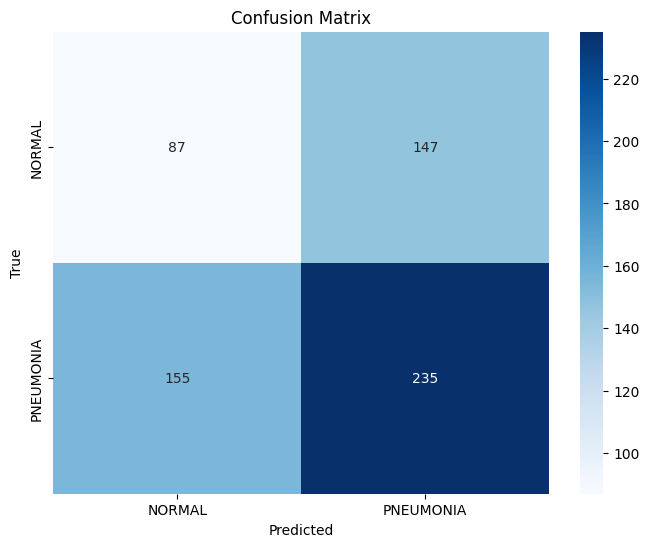

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Calculate precision, recall, and F1 score
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.5193
Recall: 0.5160
F1 Score: 0.5176


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.5160


In [ ]:

# Print the summary of the results
print("Results Summary:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Results Summary:
Test Accuracy: 0.9263
Test Loss: 0.2520
Precision: 0.5193
Recall: 0.5160
F1 Score: 0.5176
